In [13]:
import os
import numpy as np
import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from keras.callbacks import ModelCheckpoint

fruitNetModel=models.Sequential()

fruitNetModel.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
fruitNetModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Conv2D(512, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Flatten())
fruitNetModel.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
fruitNetModel.add(layers.Dropout(0.2))
fruitNetModel.add(layers.Dense(3, activation='softmax'))

fruitNetModel.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
fruitNetModel.summary()

filepath="FruitNet_Indus_Fruits_3_classes_2nd_Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 124, 124, 128)     73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 122, 122, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 61, 61, 128)       0         
__________

In [2]:
train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset\\Train'
validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset\\Validation'
test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset\\Test'

In [3]:
import os
import shutil
import glob
import random

CATEGORIES=['banana']

for category in CATEGORIES:
    src_path=os.path.join(train_dir,category)
    imgs_to_be_moved = random.sample(glob.glob(os.path.join(src_path,"*.jpg")), 40)
    for img in enumerate(imgs_to_be_moved):
        dest = os.path.join(validation_dir,category)
        if not os.path.exists(dest):
            os.makedirs(dest)
    for img in enumerate(imgs_to_be_moved):
        shutil.copy(img[1], dest)
        os.remove(img[1])

In [4]:
for category in CATEGORIES:
    src_path=os.path.join(train_dir,category)
    imgs_to_be_moved = random.sample(glob.glob(os.path.join(src_path,"*.jpg")), 80)
    for img in enumerate(imgs_to_be_moved):
        dest = os.path.join(test_dir,category)
        if not os.path.exists(dest):
            os.makedirs(dest)
    for img in enumerate(imgs_to_be_moved):
        shutil.copy(img[1], dest)
        os.remove(img[1])

In [8]:
import cv2

resized_images_train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images\\Train'
resized_images_test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images\\Test'
resized_images_validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images\\Validation'

CATEGORIES_TRAIN_DIR=['banana']
CATEGORIES_VALIDATION_DIR=['banana']
CATEGORIES_TEST_DIR=['banana']

for category in CATEGORIES_TRAIN_DIR:
    src_path=os.path.join(train_dir,category)
    dest_path = os.path.join(resized_images_train_dir,category)
    for src_img_name in os.listdir(src_path):
        try:
            img = cv2.imread(os.path.join(src_path,src_img_name))
            img = cv2.resize(img, (256,256))
            cv2.imwrite(os.path.join(dest_path,src_img_name),img)
        except Exception as e:
            pass

In [9]:
for category in CATEGORIES_VALIDATION_DIR:
    src_path=os.path.join(validation_dir,category)
    dest_path = os.path.join(resized_images_validation_dir,category)
    for src_img_name in os.listdir(src_path):
        try:
            img = cv2.imread(os.path.join(src_path,src_img_name))
            img = cv2.resize(img, (256,256))
            cv2.imwrite(os.path.join(dest_path,src_img_name),img)
        except Exception as e:
            pass

In [10]:
for category in CATEGORIES_TEST_DIR:
    src_path=os.path.join(test_dir,category)
    dest_path = os.path.join(resized_images_test_dir,category)
    for src_img_name in os.listdir(src_path):
        try:
            img = cv2.imread(os.path.join(src_path,src_img_name))
            img = cv2.resize(img, (256,256))
            cv2.imwrite(os.path.join(dest_path,src_img_name),img)
        except Exception as e:
            pass

In [11]:
batch_size=8

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation  and test data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        resized_images_train_dir,
        target_size=(256, 256),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        resized_images_validation_dir,
        target_size=(256, 256),
        batch_size=batch_size, shuffle=False)

test_generator = test_datagen.flow_from_directory(
        resized_images_test_dir,
        target_size=(256, 256),
        batch_size=batch_size, shuffle=False)

Found 1200 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [12]:
number_of_training_samples=1200
number_of_validation_samples=120
number_of_test_samples=240

In [14]:
import math

history = fruitNetModel.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=200,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
150/150 [==============================] - 63s 420ms/step - loss: 1.0035 - categorical_accuracy: 0.5058 - val_loss: 0.9697 - val_categorical_accuracy: 0.5000
Epoch 2/200
150/150 [==============================] - 52s 349ms/step - loss: 0.7962 - categorical_accuracy: 0.6092 - val_loss: 0.9100 - val_categorical_accuracy: 0.6250
Epoch 3/200
150/150 [==============================] - 52s 349ms/step - loss: 0.7574 - categorical_accuracy: 0.6425 - val_loss: 0.7305 - val_categorical_accuracy: 0.7333
Epoch 4/200
150/150 [==============================] - 52s 344ms/step - loss: 0.6283 - categorical_accuracy: 0.7450 - val_loss: 0.6472 - val_categorical_accuracy: 0.7667
Epoch 5/200
150/150 [==============================] - 49s 326ms/step - loss: 0.5802 - categorical_accuracy: 0.7600 - val_loss: 0.7211 - val_categorical_accuracy: 0.7667
Epoch 6/200
150/150 [==============================] - 49s 326ms/step - loss: 0.5655 - categorical_acc

Epoch 95/200
150/150 [==============================] - 42s 280ms/step - loss: 0.1427 - categorical_accuracy: 0.9608 - val_loss: 0.2743 - val_categorical_accuracy: 0.8917
Epoch 96/200
150/150 [==============================] - 42s 280ms/step - loss: 0.1419 - categorical_accuracy: 0.9583 - val_loss: 0.2884 - val_categorical_accuracy: 0.9250
Epoch 97/200
150/150 [==============================] - 42s 280ms/step - loss: 0.1428 - categorical_accuracy: 0.9600 - val_loss: 0.3540 - val_categorical_accuracy: 0.9167
Epoch 98/200
150/150 [==============================] - 42s 280ms/step - loss: 0.1404 - categorical_accuracy: 0.9558 - val_loss: 0.4040 - val_categorical_accuracy: 0.8833
Epoch 99/200
150/150 [==============================] - 42s 280ms/step - loss: 0.1448 - categorical_accuracy: 0.9508 - val_loss: 0.3451 - val_categorical_accuracy: 0.9000
Epoch 100/200
150/150 [==============================] - 42s 280ms/step - loss: 0.1467 - categorical_accuracy: 0.9517 - val_loss: 0.5660 - val_ca

Epoch 143/200
150/150 [==============================] - 42s 277ms/step - loss: 0.0848 - categorical_accuracy: 0.9800 - val_loss: 0.3276 - val_categorical_accuracy: 0.9333
Epoch 144/200
150/150 [==============================] - 42s 277ms/step - loss: 0.1466 - categorical_accuracy: 0.9558 - val_loss: 0.2752 - val_categorical_accuracy: 0.9167
Epoch 145/200
150/150 [==============================] - 42s 277ms/step - loss: 0.1015 - categorical_accuracy: 0.9725 - val_loss: 0.6374 - val_categorical_accuracy: 0.8833
Epoch 146/200
150/150 [==============================] - 42s 277ms/step - loss: 0.0839 - categorical_accuracy: 0.9792 - val_loss: 0.4280 - val_categorical_accuracy: 0.9083
Epoch 147/200
150/150 [==============================] - 42s 277ms/step - loss: 0.0916 - categorical_accuracy: 0.9733 - val_loss: 0.2877 - val_categorical_accuracy: 0.9417
Epoch 148/200
150/150 [==============================] - 42s 277ms/step - loss: 0.1122 - categorical_accuracy: 0.9717 - val_loss: 0.3321 - v

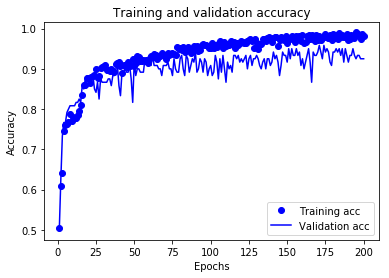

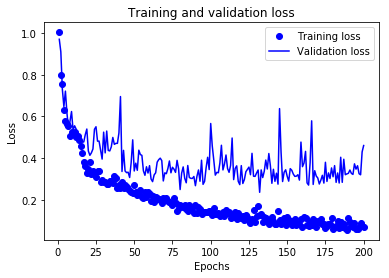

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
from tensorflow.python.keras.models import load_model

best_model = load_model('FruitNet_Indus_Fruits_3_classes.h5')

In [17]:
from tensorflow.python.keras.models import load_model

steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_generator, steps=steps_test,verbose=1)
print("Test-set accuracy: {0:.2%}".format(result[1]))

30/30 [==============================] - 3s 106ms/step - loss: 0.2321 - categorical_accuracy: 0.9333
Test-set accuracy: 93.33%


In [18]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.python.keras.utils import to_categorical
import cv2

apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images\\Test\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images\\Test\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images\\Test\\orange')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')

test_data = []
test_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (240, 256, 256, 3)
Total number of labels: (240, 1)


In [19]:
# Evaluation on test dataset

test_loss, test_score = best_model.evaluate(test_data, test_labels_one_hot_encoding, batch_size=8)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

240/240 [==============================] - 3s 13ms/sample - loss: 0.2321 - categorical_accuracy: 0.9333
Loss on test set:  0.23205834043522675
Accuracy on test set:  0.93333334


In [22]:
# Get predictions
preds = best_model.predict(test_data, batch_size=16,verbose=1)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(240,1))
print(predicted_labels.shape)
print(orig_test_labels.shape)

240/240 [==============================] - 3s 11ms/sample
(240, 1)
(240, 1)


<Figure size 432x288 with 0 Axes>

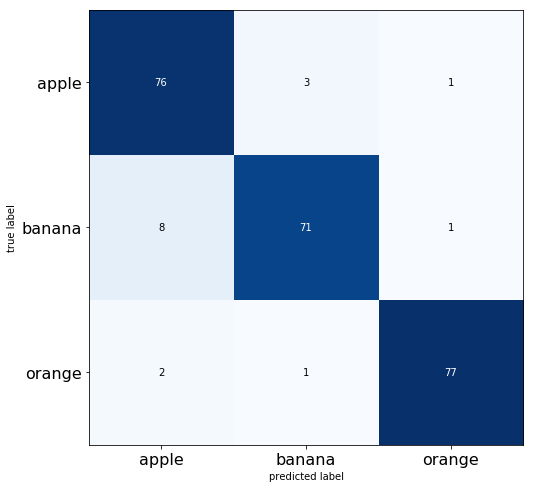

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(3), ['apple', 'banana','orange'], fontsize=16)
plt.yticks(range(3), ['apple', 'banana','orange'], fontsize=16)
plt.show()

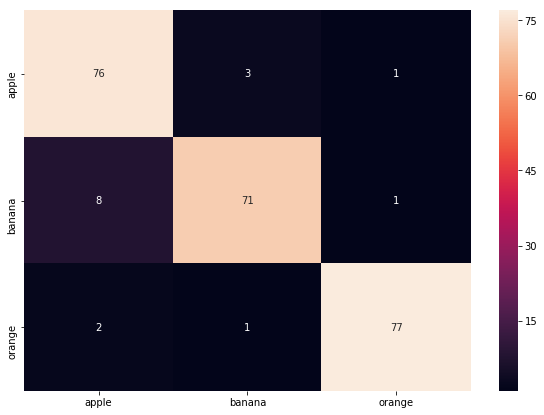

In [24]:
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(cm, index = [i for i in ['apple','banana','orange']],
                  columns = [i for i in ['apple','banana','orange']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

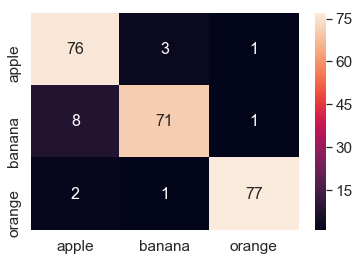

In [25]:
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

plt.show()